In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Retina 
%config InlineBackend.figure_format = 'retina'


# K-Nearest Neighbors 

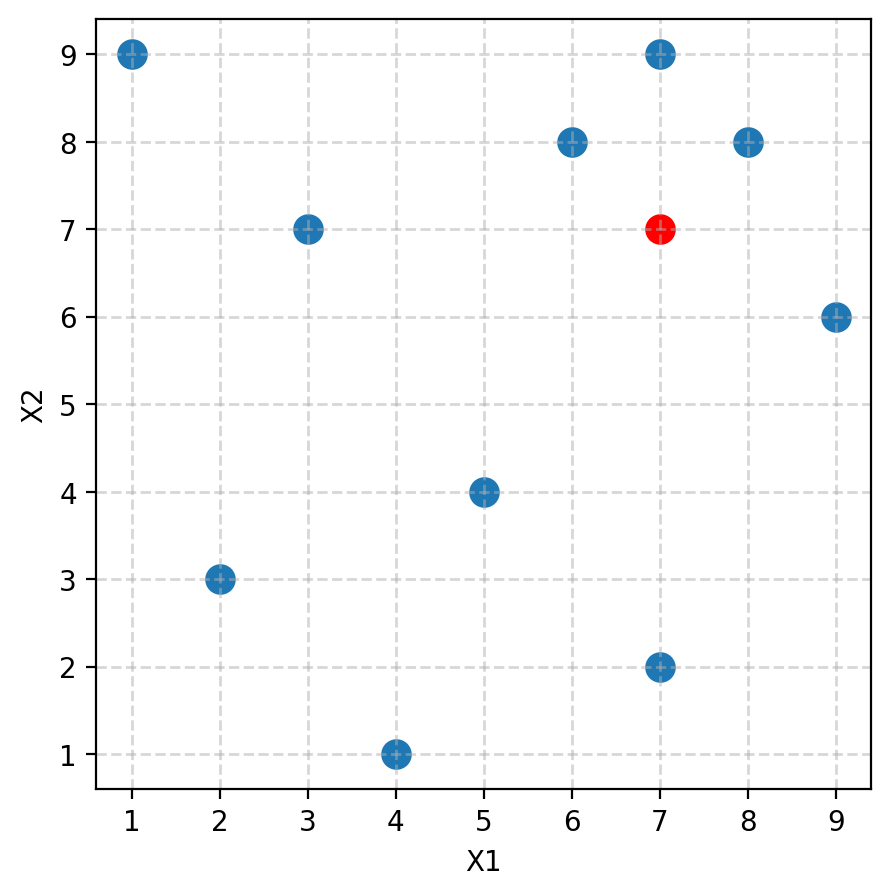

<Axes: xlabel='X1', ylabel='X2'>

In [88]:
X = np.array([[1, 9], [2, 3], [4, 1], [3, 7], [5, 4], [6, 8], [7, 2], [8, 8], [7, 9], [9, 6]])

query_pt = np.array([7, 7])

def plot_dataset(plot_nearest=False,points = None):
    fig,ax = plt.subplots(figsize=(5, 5))
    ax.scatter(X[:, 0], X[:, 1], s=100)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    # ax.gca().set_aspect('equal', adjustable='box')
    ax.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
    ax.set_xticks(np.arange(min(X[:, 0]), max(X[:, 0])+1, 1))
    ax.set_yticks(np.arange(min(X[:, 1]), max(X[:, 1])+1, 1))
    if plot_nearest:
        for point in points:
            ax.plot([query_pt[0], point[0]], [query_pt[1], point[1]], 'r--', linewidth=1)
    
    ax.scatter(query_pt[0], query_pt[1], color='red', s=100)
    plt.show()
    return ax
    

plot_dataset()



In [89]:
class KNN:
    def __init__(self, k=3):
        self.k = k

        
    def predict(self, X,query_pt):
        distances = np.sqrt(np.sum((X - query_pt)**2, axis=1))
        sorted_indices = np.argsort(distances)
        k_nearest_indices = sorted_indices[:self.k]
        nearest_points = X[k_nearest_indices]
        return nearest_points

    

    

Number of nearest points: 3


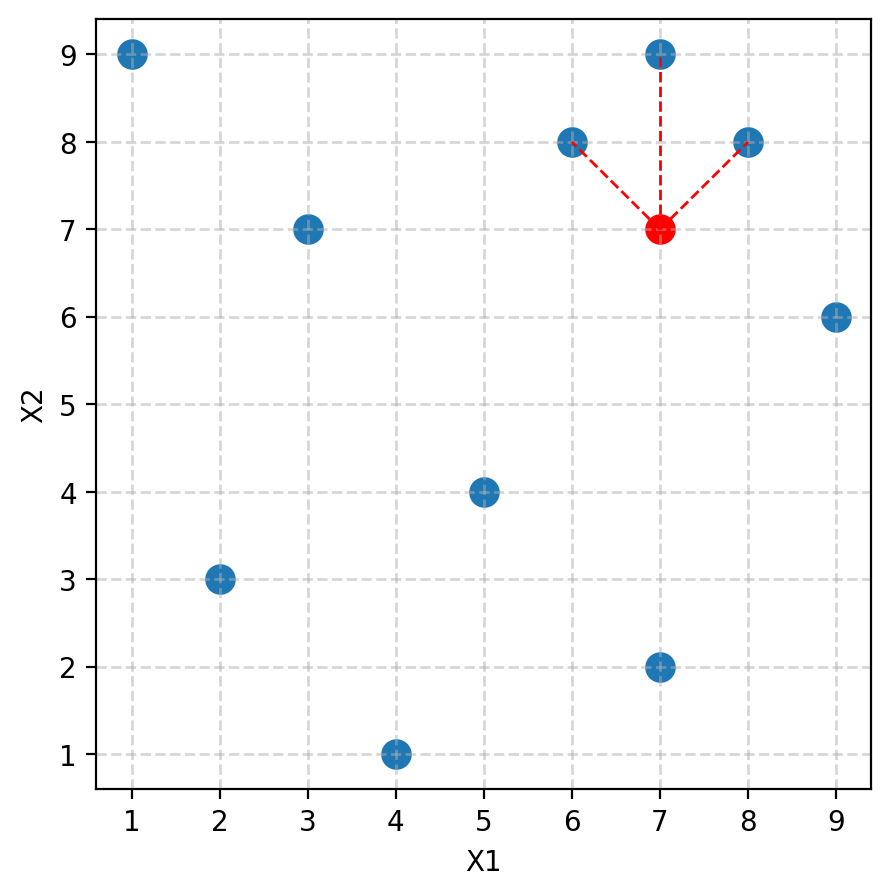

<Axes: xlabel='X1', ylabel='X2'>

In [90]:
model = KNN(k=3)
nearest_points = model.predict(X, query_pt)
print(f"Number of nearest points: {len(nearest_points)}")
plot_dataset(plot_nearest=True,points=nearest_points)

# KD-Trees

In [91]:

class Node:
    def __init__(self,threshold=None, median=None, split_dim=None, left=None, right=None,points = None):
        self.threshold = median
        self.split_dim = split_dim
        self.left = left
        self.right = right
        self.isleaf = False
        self.points = None

class KDTree:
    def __init__(self, X):
        self.root = self.build(X)
    
    def build(self, X, depth=0,max_depth=2):
        if len(X) == 0:
            return None

        if depth == max_depth:
            current_node = Node()
            current_node.isleaf = True
            current_node.points = X
            return current_node

        split_dim = depth % X.shape[1] # alternate between X1 and X2
        X = X[X[:, split_dim].argsort()]
        median_idx = len(X) // 2
        if len(X)%2==0:
            median_val = (X[median_idx, split_dim] + X[median_idx-1, split_dim])/2
        else:
            median_val = X[median_idx, split_dim]
        left_subtree_data = X[X[:,split_dim] <= median_val]
        right_subtree_data = X[X[:,split_dim] > median_val]
        return Node(
            median=median_val,
            split_dim=split_dim,
            left=self.build(left_subtree_data, depth + 1),
            right=self.build(right_subtree_data, depth + 1),
            points = X
        )
    
    def nearest_neighbor(self, query_pt,k=1):

        # forward pass to find the leaf node and points
        current_node = self.root
        while not current_node.isleaf:
            # print(current_node.threshold,current_node.split_dim)
            if query_pt[current_node.split_dim] <= current_node.threshold:
                current_node = current_node.left
            else:
                current_node = current_node.right
        X = current_node.points
        nearest_points = KNN(k=k).predict(X, query_pt)
        return nearest_points
    
    def visualize(self,nearest_points,query_pt):
        fig,ax = plt.subplots(figsize=(5, 5))
        ax.scatter(X[:, 0], X[:, 1], s=100)
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        # ax.gca().set_aspect('equal', adjustable='box')
        ax.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
        ax.set_xticks(np.arange(min(X[:, 0]), max(X[:, 0])+1, 1))
        ax.set_yticks(np.arange(min(X[:, 1]), max(X[:, 1])+1, 1))
        for point in nearest_points:
            ax.plot([query_pt[0], point[0]], [query_pt[1], point[1]], 'r--', linewidth=1)
    
        ax.scatter(query_pt[0], query_pt[1], color='red', s=100)
        # print("Next")
        self.plot_tree(self.root,ax)
        

    def plot_tree(self,node,ax):
        x_values = np.arange(0, 10, 1)
        y_values = np.arange(0, 10, 1)
        if node is None:
            return
        if node.isleaf:
            return
        # print(node.threshold,node.split_dim)
        if node.split_dim == 0:
            ax.plot([node.threshold]*len(y_values),y_values ,linestyle="--", linewidth=1,color='green')
        else:
            ax.plot(x_values,[node.threshold]*len(x_values),linestyle="--", linewidth=1,color='green')
        # plt.xticks(np.arange(0, 10, 1))
        # plt.yticks(np.arange(0, 10, 1))
        # plt.show()  
        self.plot_tree(node.left,ax)
        self.plot_tree(node.right,ax)
              


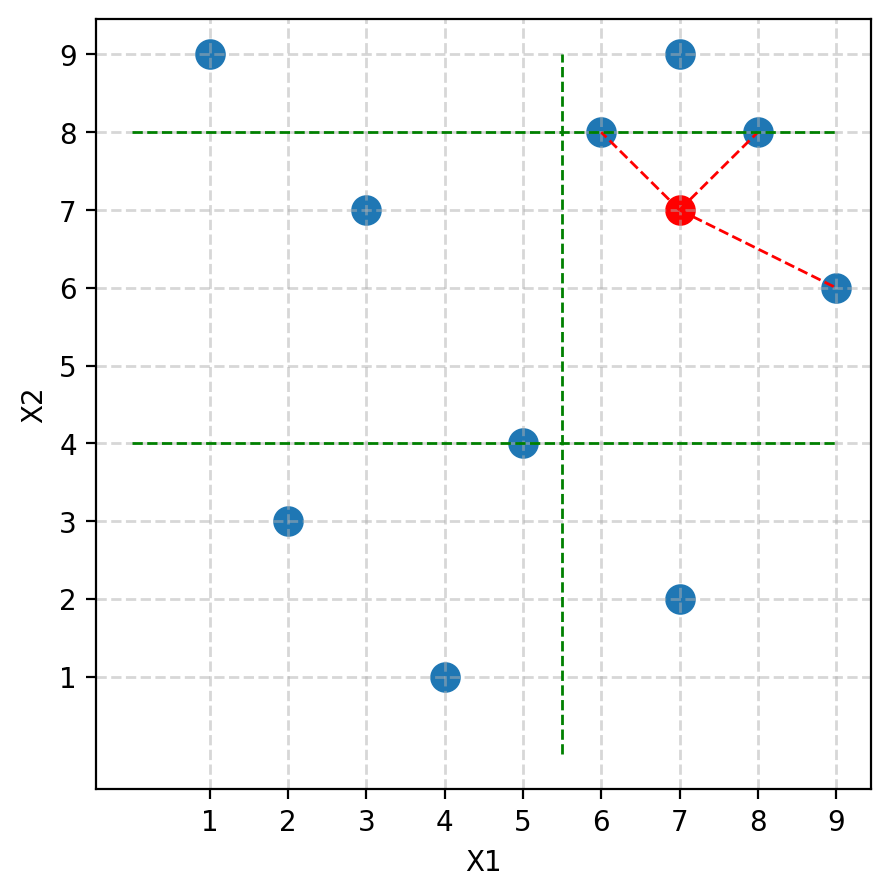

In [93]:
kdtree = KDTree(X)
nearest_points = kdtree.nearest_neighbor(query_pt,k=3)
kdtree.visualize(nearest_points,query_pt)